In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
num_classes = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train_mean = np.mean(x_train, axis=0)
# print(x_train_mean.shape)
x_train -= x_train_mean
x_test_ = x_test - x_train_mean

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
model = keras.models.load_model('saved_models/resnet20v1_no_mean.h5')

In [5]:
def plot_image(prediction_array, true_label, image):
    prediction = classes[np.argmax(prediction_array)]
    true_value = classes[np.argmax(true_label)]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(image)
    if prediction == true_value:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(str(prediction),
                                100*np.max(prediction_array),
                                str(true_value)),
                                color=color)

def plot_value_array(prediction_array, true_label):
    prediction = classes[np.argmax(prediction_array)]
    true_value = classes[np.argmax(true_label)]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

0.9152
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


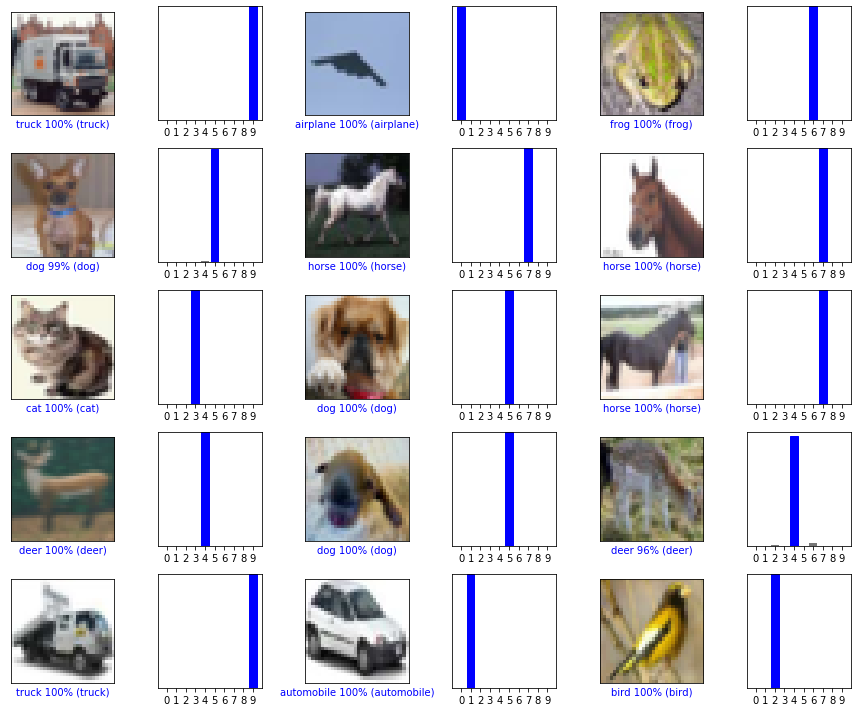

In [19]:
# %matplotlib html
scores = model.evaluate(x_test, y_test, verbose=0)
print(scores[1])

predictions = model.predict(x_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
print(classes)
random_index = np.random.randint(0, high=len(x_test)-1, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(predictions[random_index[i]], y_test[random_index[i]], x_test[random_index[i]])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(predictions[random_index[i]], y_test[random_index[i]])
plt.tight_layout()
plt.show()